In [77]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
train  = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')

C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\567753585.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train  = pd.read_csv('train.csv')


In [5]:
df = pd.merge(train,store,on='Store',how='left')

In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df[(df['Open']) & (df['Sales']>0)]

In [11]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\394802485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)


In [12]:
df['Promo2SinceWeek'].fillna(0,inplace=True)
df['Promo2SinceYear'].fillna(0,inplace=True)
df['PromoInterval'].fillna("None",inplace=True)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\964234779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo2SinceWeek'].fillna(0,inplace=True)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\964234779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [13]:
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0],inplace=True)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\4028859461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\4028859461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [14]:
df['StoreType'] = df['StoreType'].astype("category")
df['Assortment'] = df['Assortment'].astype("category")

In [15]:
df['Year'] = df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Dayofweek'] =df['Date'].dt.dayofweek
df['Weekofyear'] = df["Date"].dt.isocalendar().week

In [16]:
df["Quarter"] = df["Date"].dt.quarter

# Binary weekend flag
df["IsWeekend"] = df["DayOfWeek"].isin([5,6]).astype(int)

In [23]:
df["CompetitionOpenDate"] = pd.to_datetime(dict(year=df["CompetitionOpenSinceYear"],
                                                 month=df["CompetitionOpenSinceMonth"],
                                                 day=15), errors='coerce')

df["CompOpenMonthsAgo"] = (
    (df["Date"].dt.year - df["CompetitionOpenDate"].dt.year) * 12 +
    (df["Date"].dt.month - df["CompetitionOpenDate"].dt.month)
).fillna(0).astype(int)


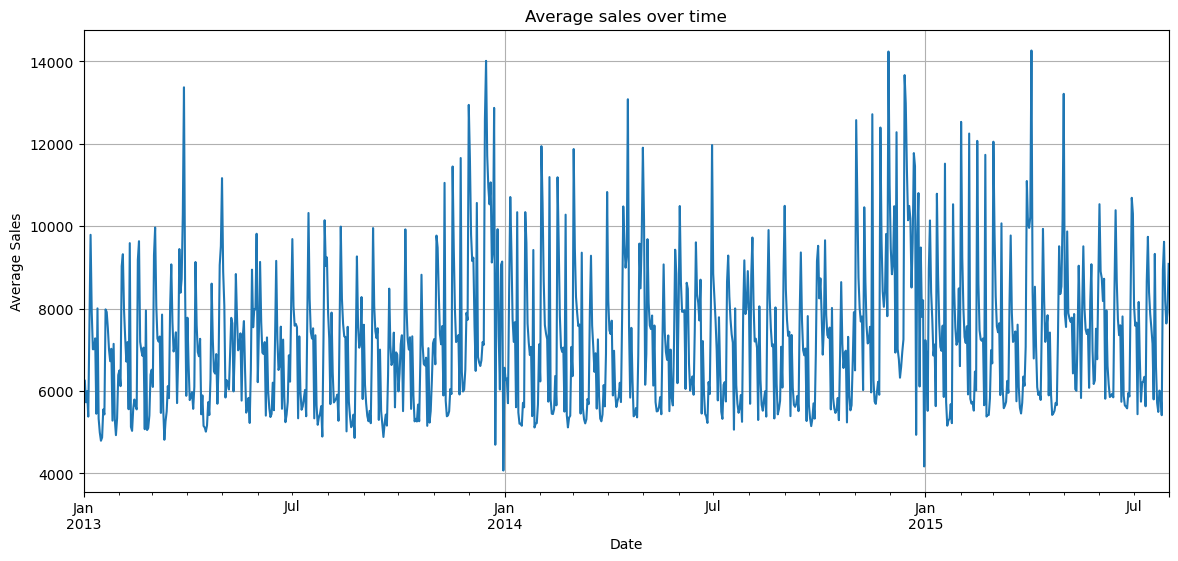

In [25]:
plt.figure(figsize=(14,6))
df.groupby("Date")['Sales'].mean().plot()
plt.title("Average sales over time")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.grid(True)

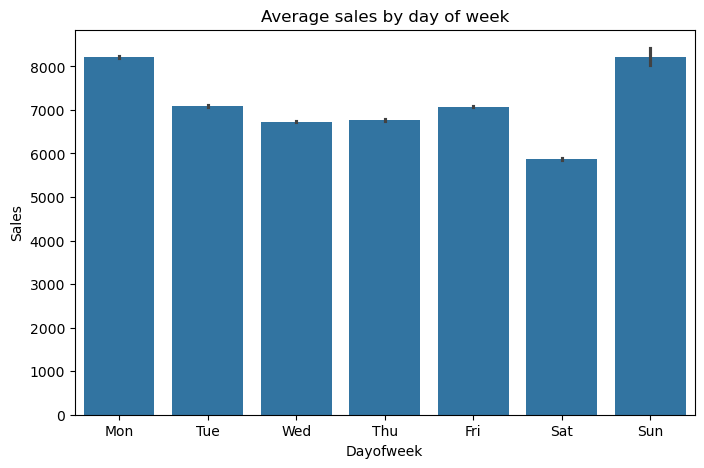

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Dayofweek',y='Sales',data=df)
plt.title("Average sales by day of week")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

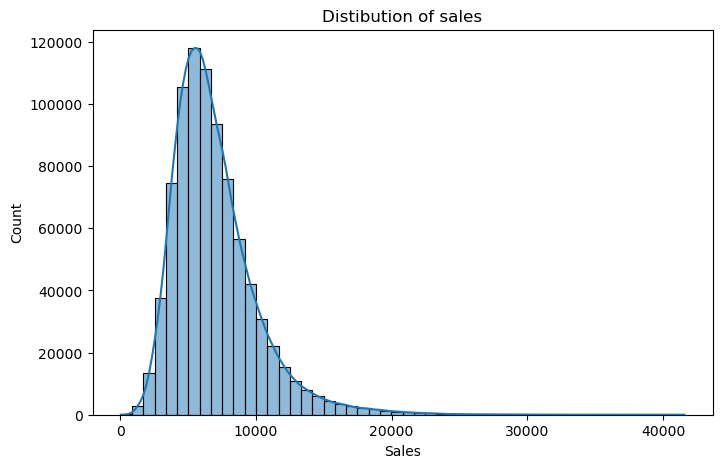

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'],bins=50,kde=True)
plt.title('Distibution of sales')
plt.show()

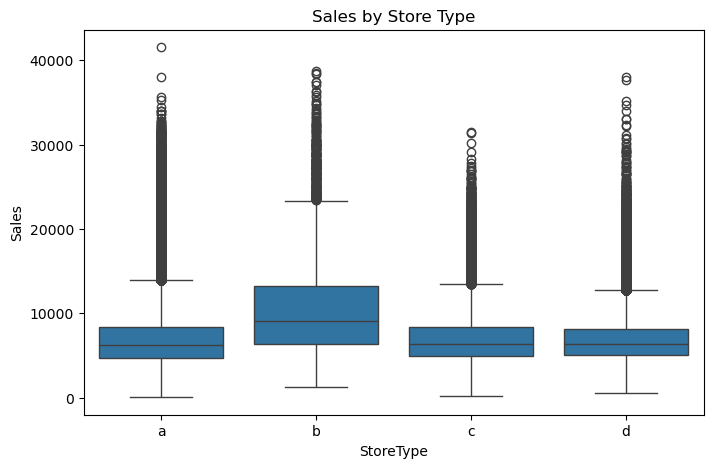

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='StoreType',y='Sales',data=df)
plt.title('Sales by Store Type')
plt.show()

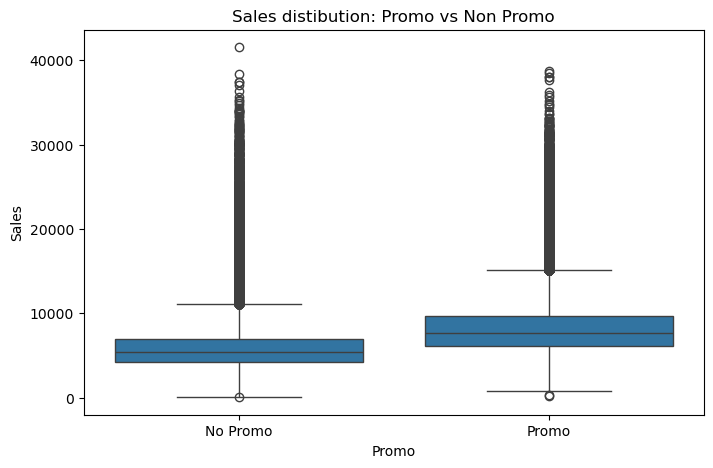

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Promo',y='Sales',data=df)
plt.title('Sales distibution: Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.xticks([0,1],['No Promo',"Promo"])
plt.show()

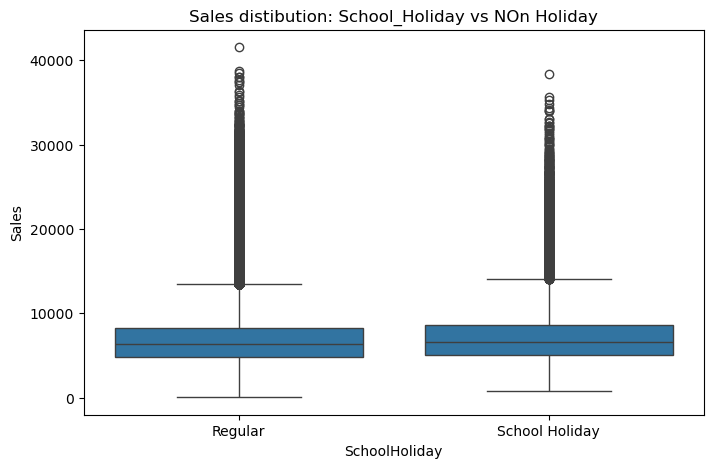

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SchoolHoliday',y='Sales',data=df)
plt.title('Sales distibution: School_Holiday vs NOn Holiday')
plt.xlabel('SchoolHoliday')
plt.ylabel('Sales')
plt.xticks([0,1],['Regular',"School Holiday"])
plt.show()

In [31]:
df['Comptdistbin'] = pd.cut(df['CompetitionDistance'],bins=[0,500,1000,2000,5000,10000],labels=['0-500','501-1k','1k-2k','2k-5k','5k+'])



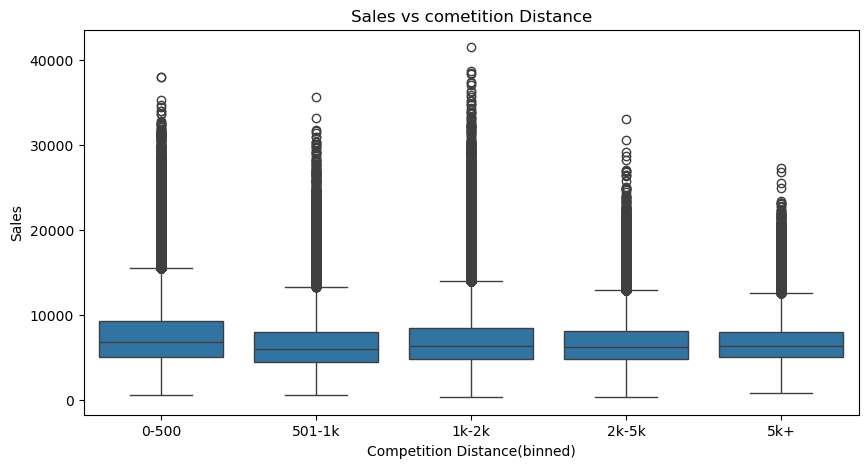

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x= 'Comptdistbin',y='Sales',data=df)
plt.title('Sales vs cometition Distance')
plt.xlabel('Competition Distance(binned)')
plt.ylabel('Sales')
plt.show()

In [33]:
df['CompetitionDistance'].describe()


count    844338.000000
mean       5450.031907
std        7801.087197
min          20.000000
25%         710.000000
50%        2320.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [34]:
print(df[['Sales', 'CompetitionDistance']].corr())


                        Sales  CompetitionDistance
Sales                1.000000            -0.035907
CompetitionDistance -0.035907             1.000000


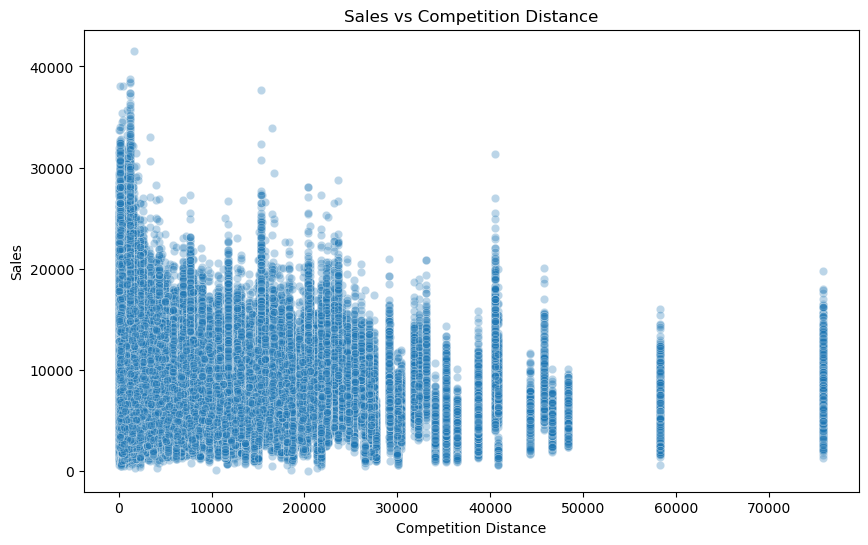

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df, alpha=0.3)
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()


In [36]:
# Bin the distance
df['DistanceBin'] = pd.cut(df['CompetitionDistance'], bins=[0, 500, 1000, 2000, 5000, 10000], labels=['0-500','501-1k','1k-2k','2k-5k','5k+'])

# Average sales by StoreType and DistanceBin
grouped = df.groupby(['StoreType', 'DistanceBin'])['Sales'].mean().unstack()
print(grouped)


DistanceBin         0-500       501-1k         1k-2k        2k-5k          5k+
StoreType                                                                     
a             7754.331086  6605.744559   6677.766402  6504.604047  6696.268724
b            10760.398936  9510.336148  11318.873379  4070.828326          NaN
c             7201.128074  6221.269772   7391.810081  6769.919869  6308.671238
d             6493.473725  6450.921265   6869.919791  6927.150096  6832.923160


C:\Users\Pratik\AppData\Local\Temp\ipykernel_14588\1788571344.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['StoreType', 'DistanceBin'])['Sales'].mean().unstack()


In [37]:
store_sales = df.groupby("Store")["Sales"].mean().sort_values(ascending=False)

# Top 10 Stores
top_10 = store_sales.head(10)
bottom_10 = store_sales.tail(10)

print("🔝 Top 10 Stores by Average Sales:\n", top_10)
print("\n🔻 Bottom 10 Stores by Average Sales:\n", bottom_10)


🔝 Top 10 Stores by Average Sales:
 Store
817     21757.483418
262     20718.515924
1114    20666.562500
251     19123.068036
842     18574.795820
513     18179.089286
562     17969.556263
788     17961.914541
383     17294.716667
756     16574.816431
Name: Sales, dtype: float64

🔻 Bottom 10 Stores by Average Sales:
 Store
425    3237.659794
210    3193.984596
219    3133.712452
794    3083.812821
254    3005.983312
841    2972.608974
208    2936.290816
198    2900.604859
543    2790.380282
307    2703.736573
Name: Sales, dtype: float64


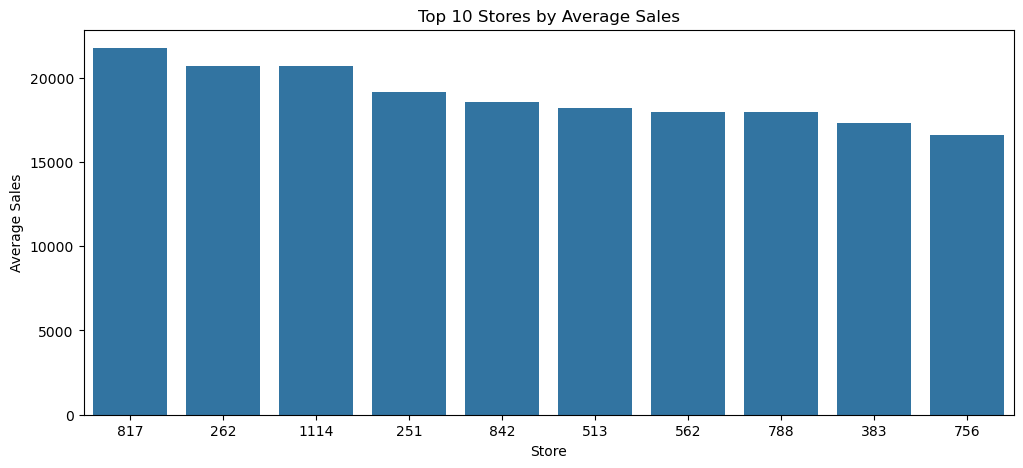

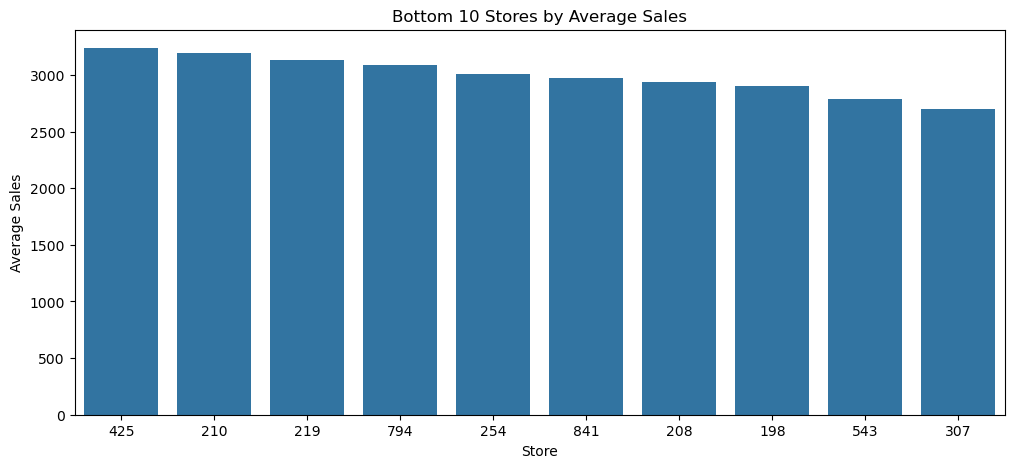

In [38]:
# Barplot for Top Stores
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10.index.astype(str), y=top_10.values)
plt.title("Top 10 Stores by Average Sales")
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.show()

# Barplot for Bottom Stores
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_10.index.astype(str), y=bottom_10.values)
plt.title("Bottom 10 Stores by Average Sales")
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.show()


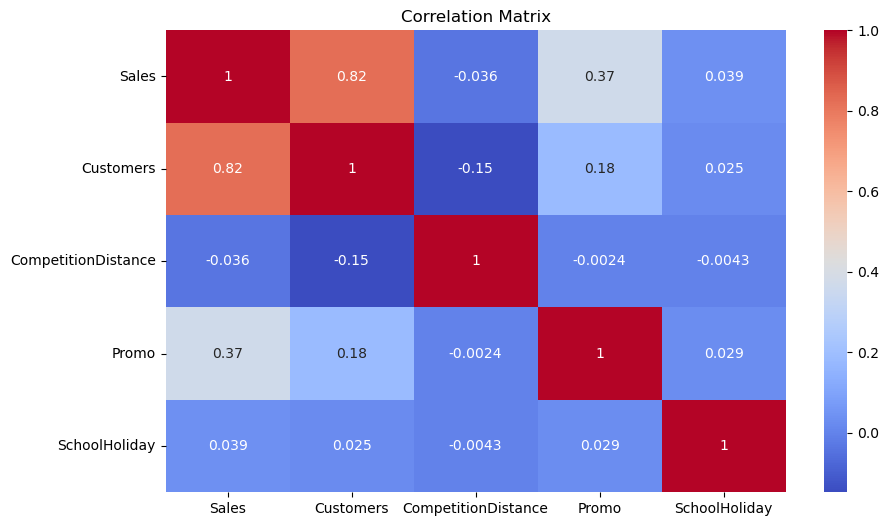

In [39]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Sales", "Customers", "CompetitionDistance", "Promo", "SchoolHoliday"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [40]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Day,Dayofweek,Weekofyear,Quarter,IsWeekend,CompetitionOpenDate,CompOpenMonthsAgo,Comptdistbin,DistanceBin
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,7,31,4,31,3,1,2008-09-15,82,1k-2k,1k-2k
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,7,31,4,31,3,1,2007-11-15,92,501-1k,501-1k
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,7,31,4,31,3,1,2006-12-15,103,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,7,31,4,31,3,1,2009-09-15,70,501-1k,501-1k
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,7,31,4,31,3,1,2015-04-15,3,NaN,NaN


In [67]:
def promo_month(row):
    promo_str = row["PromoInterval"]
    
    if promo_str == "None" or pd.isna(promo_str):
        return 0
    
    # Replace 'Sept' with 'Sep' to match '%b' format
    promo_str = promo_str.replace("Sept", "Sep")

    current_month = row["Date"].month
    promo_months = [pd.to_datetime(m.strip(), format='%b').month for m in promo_str.split(',')]
    
    return int(current_month in promo_months)


In [69]:
df['IsPromoMonth'] = df.apply(promo_month,axis=1)

In [65]:
print(df["PromoInterval"].unique())


['None' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [73]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Year                              0
Month                             0
Day                               0
Dayofweek                         0
Weekofyear                        0
Quarter                           0
IsWeekend                         0
CompetitionOpenDate               0
CompOpenMonthsAgo                 0
Comptdistbin                

In [75]:
# Same for Promo2
df["Promo2SinceYear"].fillna(0, inplace=True)
df["Promo2SinceWeek"].fillna(0, inplace=True)

# Convert promo2 start week to date
from datetime import datetime

def get_promo2_date(row):
    try:
        return pd.to_datetime(f'{int(row["Promo2SinceYear"])}-{int(row["Promo2SinceWeek"])}-1', format='%Y-%W-%w')
    except:
        return pd.NaT

df["Promo2StartDate"] = df.apply(get_promo2_date, axis=1)
df["Promo2OpenWeeksAgo"] = ((df["Date"] - df["Promo2StartDate"]) / np.timedelta64(1, 'W')).fillna(0).astype(int)


In [81]:
le = LabelEncoder()
df["StoreType"] = le.fit_transform(df["StoreType"].astype(str))
df["Assortment"] = le.fit_transform(df["Assortment"].astype(str))
df["StateHoliday"] = le.fit_transform(df["StateHoliday"].astype(str))

In [83]:
# Sales is often skewed
df["LogSales"] = np.log1p(df["Sales"])


In [85]:
df = df.sort_values(['Store', 'Date'])

# Lag features
df['Sales_lag1'] = df.groupby('Store')["Sales"].shift(1)
df['Sales_lag7'] = df.groupby('Store')["Sales"].shift(7)

# Rolling mean
df['Sales_roll_mean_7'] = df.groupby('Store')["Sales"].shift(1).rolling(7).mean()


In [87]:
df.to_csv('After_feat.csv')